In [104]:
import numpy as np
import pandas as pd

In [105]:
# average rookie contract is 4
years_later = 2

drafts = pd.read_csv(
    "drafts.csv")
rosters = pd.read_csv(
    "rosters.csv")

# removes drafts data from before 2006
drafts.drop(
    drafts.index[drafts['season'] < 2006], inplace=True)
drafts.drop(
    drafts.index[drafts['season'] >= 2019-5], inplace=True)




In [106]:
display(drafts)

,Unnamed: 0,season,team,round,pick,pfr_id,pfr_name,player_id,side,category,position
7557,7558,2006,HOU,1,1,WillMa22,Mario Williams,NaN,D,DL,DE
7558,7559,2006,NO,1,2,BushRe00,Reggie Bush,NaN,O,RB,RB
7559,7560,2006,TEN,1,3,YounVi00,Vince Young,00-0024218,O,QB,QB
7560,7561,2006,NYJ,1,4,FergDB20,D'Brickashaw Ferguson,NaN,O,OL,T
7561,7562,2006,GB,1,5,HawkA.20,A.J. Hawk,NaN,D,LB,LB
...,...,...,...,...,...,...,...,...,...,...,...
9586,9587,2013,MIA,7,250,JoneDo02,Don Jones,NaN,D,DB,DB
9587,9588,2013,CIN,7,251,JohnTJ00,T.J. Johnson,NaN,O,OL,C
9588,9589,2013,SF,7,252,CoopMa00,Marcus Cooper,NaN,D,DB,DB
9589,9590,2013,NYG,7,253,CoxxMi00,Michael Cox,NaN,O,RB,RB


In [107]:
# Matches abbreviations with the proper column
# Some teams have changed location over the years, their current abbreviation is used in column names
teams_dict = {
    "BUF": "BUF", "MIA": "MIA", "ATL": "ATL", "PIT": "PIT", "BAL": "BAL", "HOU": "HOU",
    "TB": "TB", "WAS": "WAS", "TEN": "TEN", "CAR": "CAR", "NYJ": "NYJ", "CLE": "CLE", "CIN": "CIN",
    "STL": "LAR", "LAR": "LAR", "LA": "LAR", "OAK": "LV", "LV": "LV", "LAC": "LAC", "SD": "LAC",
    "NYG": "NYG", "DEN": "DEN", "ARI": "ARI", "IND": "IND", "DET": "DET", "MIN": "MIN", "KC": "KC",
    "CAR": "CAR", "DAL": "DAL", "CHI": "CHI", "GB": "GB", "NE": "NE", "SF": "SF", "NO": "NO", "PHI": "PHI",
    "SEA": "SEA", "JAX": "JAX"
}

# For initializing column names
categories_list = ['DL', 'RB', 'QB', 'OL', 'LB', 'TE', 'DB', 'WR', 'K', 'P']
positions_list = ['DE', 'RB', 'QB', 'T', 'LB', 'TE', 'DB', 'DT', 'G', 'WR', 'C', 'K', 'NT', 'P', 'OL', 'DL'] # T is offensive tackle, G is guard, NT is nose tackle



# Matches possible side values with the proper column
side_dict = {
    "O": "is_offense", "D": "is_defense", "S": "is_special_teams"
}


In [108]:
new_cols = ['is_offense', 'is_defense', 'is_special_teams']

for year in range(years_later): # Columns that change value each year
    new_cols.append('games_year_{}'.format(year+1))
    new_cols.append('starts_year_{}'.format(year+1))
    new_cols.append('value_year_{}'.format(year+1))
    # Each team value is stored as a 1 or 0 (1 means the player is on that team's roster)
    for team in teams_dict.values():
        if 'on_{}_year_{}'.format(team, year+1) not in new_cols:
            new_cols.append('on_{}_year_{}'.format(team, year+1)) 

for team in teams_dict.values():
    if 'drafted_by_{}'.format(team) not in new_cols:
        new_cols.append('drafted_by_{}'.format(team))
# Creates a column name for each possible team value
for position in positions_list:
    if 'position_{}'.format(position) not in new_cols:
        new_cols.append('position_{}'.format(position))
for category in categories_list:
    if 'category_{}'.format(category) not in new_cols:
        new_cols.append('category_{}'.format(category))

In [109]:
# Using the drafts .csv as a base for a dataframe of player profiles each year
player_profiles = drafts.copy()

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

for col in (new_cols + ['5_years_later']):
    player_profiles[col] = [0 for x in range(len(player_profiles))]




In [110]:
display(rosters)

,Unnamed: 0,season,team,playerid,full_name,name,side,category,position,games,starts,years,av
0,1,2006,ARI,LeinMa00,Matt Leinart,M.Leinart,O,QB,QB,12.0,11.0,0,8.0
1,2,2006,ARI,LewiJo22,Jonathan Lewis,J.Lewis,NaN,NaN,NaN,4.0,0.0,0,0.0
2,3,2006,ARI,LiwiCh20,Chris Liwienski,C.Liwienski,O,OL,LG,16.0,6.0,8,4.0
3,4,2006,ARI,ArriJ.00,J.J. Arrington,J.Arrington,NaN,NaN,NaN,16.0,0.0,1,2.0
4,5,2006,ARI,LutuDe20,Deuce Lutui,D.Lutui,O,OL,RG,15.0,9.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28612,28613,2019,WAS,IoanMa01,Matthew Ioannidis,M.Ioannidis,D,DL,DT,NaN,NaN,3,NaN
28613,28614,2019,WAS,AlexAd00,Adonis Alexander,A.Alexander,NaN,NaN,NaN,NaN,NaN,1,NaN
28614,28615,2019,WAS,BergTo00,Tony Bergstrom,T.Bergstrom,O,OL,OT,NaN,NaN,7,NaN
28615,28616,2019,WAS,WoodJo01,Josh Woodrum,J.Woodrum,O,QB,QB,NaN,NaN,1,NaN


In [111]:
for index, row in player_profiles.iterrows():
    for year in range(years_later):
        
        # Retreives a player's data for a specific year
        temp = rosters
        temp = temp[(temp['playerid'] == row['pfr_id']) & (temp['season'] == row['season'] + year)]
        
        if temp.empty:
            continue
            
        player_profiles.at[index, 'on_{}_year_{}'.format(teams_dict[temp['team'].values[0]], year+1)] = 1
        
        player_profiles.at[index, 'games_year_{}'.format(year+1)] = (temp['games'].values[0] if temp['games'].values[0] != "NaN" else 0)
        player_profiles.at[index, 'starts_year_{}'.format(year+1)] = (temp['starts'].values[0] if temp['starts'].values[0] != "NaN" else 0)        
        player_profiles.at[index, 'value_year_{}'.format(year+1)] = (temp['av'].values[0] if temp['av'].values[0] != "NaN" else 0)
    
    # Checks if a player is on a roster after 5 seasons
    if not rosters[(rosters['season'] == row['season'] + 5) & (rosters['playerid'] == row['pfr_id'])].empty:
        player_profiles.at[index, '5_years_later'] = 1

    
    player_profiles.at[index, side_dict[row['side']]] = 1
    player_profiles.at[index, 'category_{}'.format(row['category'])] = 1
    player_profiles.at[index, 'position_{}'.format(row['position'])] = 1

    player_profiles.at[index, 'drafted_by_{}'.format(teams_dict[row['team']])] = 1

# Fills all remaining null values with 0
player_profiles.fillna(0, inplace=True)



In [112]:
display(player_profiles)


,Unnamed: 0,season,team,round,pick,pfr_id,pfr_name,player_id,side,category,...,category_RB,category_QB,category_OL,category_LB,category_TE,category_DB,category_WR,category_K,category_P,5_years_later
7557,7558,2006,HOU,1,1,WillMa22,Mario Williams,0,D,DL,...,0,0,0,0,0,0,0,0,0,1
7558,7559,2006,NO,1,2,BushRe00,Reggie Bush,0,O,RB,...,1,0,0,0,0,0,0,0,0,1
7559,7560,2006,TEN,1,3,YounVi00,Vince Young,00-0024218,O,QB,...,0,1,0,0,0,0,0,0,0,1
7560,7561,2006,NYJ,1,4,FergDB20,D'Brickashaw Ferguson,0,O,OL,...,0,0,1,0,0,0,0,0,0,1
7561,7562,2006,GB,1,5,HawkA.20,A.J. Hawk,0,D,LB,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9587,2013,MIA,7,250,JoneDo02,Don Jones,0,D,DB,...,0,0,0,0,0,1,0,0,0,0
9587,9588,2013,CIN,7,251,JohnTJ00,T.J. Johnson,0,O,OL,...,0,0,1,0,0,0,0,0,0,0
9588,9589,2013,SF,7,252,CoopMa00,Marcus Cooper,0,D,DB,...,0,0,0,0,0,1,0,0,0,1
9589,9590,2013,NYG,7,253,CoxxMi00,Michael Cox,0,O,RB,...,1,0,0,0,0,0,0,0,0,0


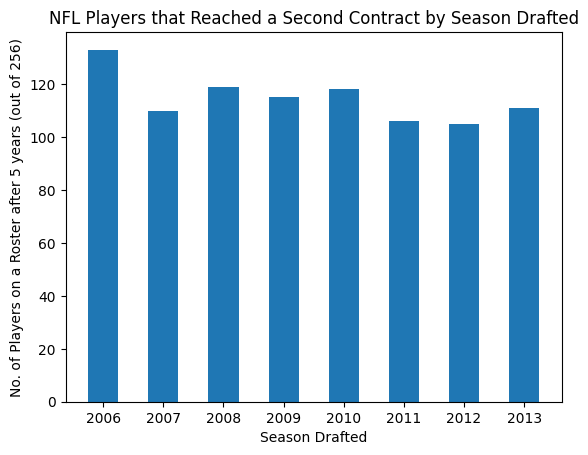

In [113]:
import matplotlib.pyplot as plt

player_numbers = []

for year in range(2006, 2014):
    temp = player_profiles[player_profiles['season'] == (year)]
    temp = temp[temp['5_years_later'] == 1]
    player_numbers.append(len(temp))

fig = plt.figure()
plt.bar(range(2006, 2014), player_numbers,
        width = .5)

plt.xlabel("Season Drafted")
plt.ylabel("No. of Players on a Roster after 5 years (out of 256)")
plt.title("NFL Players that Reached a Second Contract by Season Drafted")
plt.show()

In [114]:
# Logistic regression model without cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['pick'] + new_cols


X = player_profiles[feature_cols]  # Features
y = player_profiles['5_years_later']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16)

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=2000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)



In [115]:
from sklearn.metrics import confusion_matrix, classification_report


matrix = confusion_matrix(y_test, y_pred)

confmtrx = np.array(matrix)

# Visualizing confusion matrix of test results
pd.DataFrame(confmtrx, index=['second_contract', 'no_second_contract', ], 
             columns=['Predicted_second_contract', 'Predicted_no_second_contract', ])

,Predicted_second_contract,Predicted_no_second_contract
second_contract,197,67
no_second_contract,78,167


In [116]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.72      0.75      0.73       264
           1       0.71      0.68      0.70       245

    accuracy                           0.72       509
   macro avg       0.72      0.71      0.71       509
weighted avg       0.72      0.72      0.71       509



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


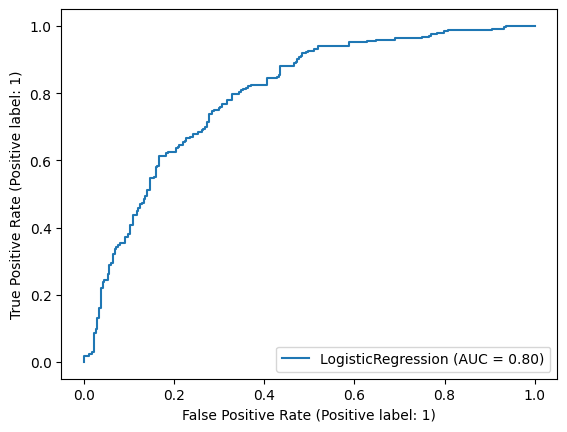

In [117]:
from sklearn import metrics 

metrics.plot_roc_curve(logreg, X_test, y_test)

In [118]:
score = metrics.accuracy_score(y_test,y_pred)

auc = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

print("accuracy score: {}\nauc: {}".format(score, auc))


accuracy score: 0.7151277013752456
auc: 0.795995670995671


In [119]:
# Logistic regression model using KFold cross examination
from sklearn.model_selection import KFold, cross_val_score

model = LogisticRegression(solver='liblinear')

X = player_profiles[feature_cols]
y = player_profiles['5_years_later']

kf = KFold(n_splits=5)
acc_score = []

result = cross_val_score(model , X, y, cv = kf)


print("Accuracy: {}\nStandard Deviation: {}".format(result.mean()*100.0, result.std()*100.0))


Accuracy: 73.69833335350577
Standard Deviation: 1.975611307514739


In [120]:
# Organizzing cross validation results for plotting
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y):
    
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=kf,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
cross_val_result = cross_validation(LogisticRegression(solver='liblinear'), X, y)

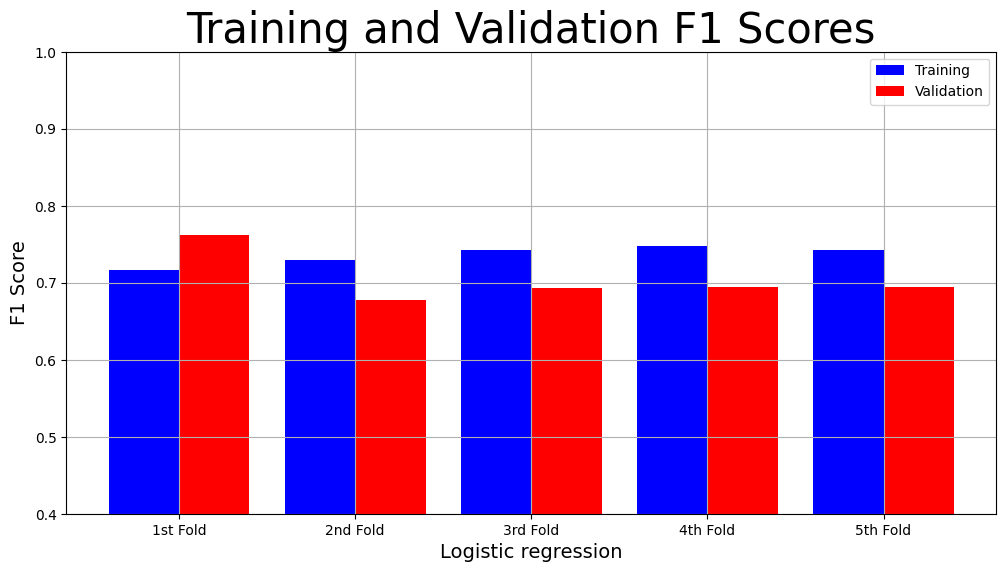

In [121]:
# Plots the results of the K-Fold cros evaluation over the 4 iterations 
def plot_result(x_label, y_label, plot_title, train_data, test_data):
      
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, test_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


plot_result("Logistic regression", "F1 Score", "Training and Validation F1 Scores", cross_val_result["Training F1 scores"], cross_val_result["Validation F1 scores"])

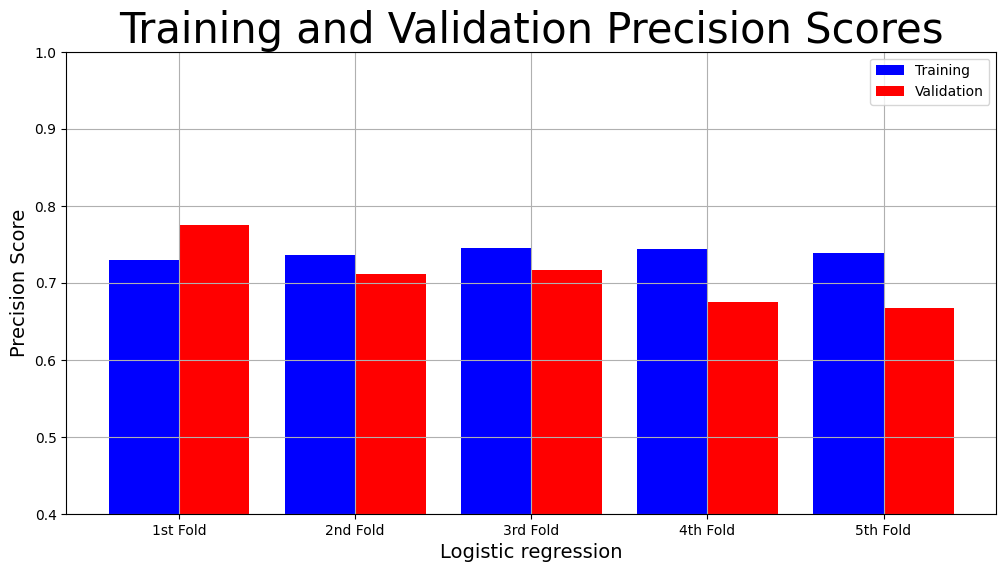

In [122]:
plot_result("Logistic regression", "Precision Score", "Training and Validation Precision Scores", cross_val_result["Training Precision scores"], cross_val_result["Validation Precision scores"])



In [123]:
print(cross_val_result["Training F1 scores"])
print(cross_val_result["Validation F1 scores"])

[0.71717172 0.72928177 0.74250681 0.74744724 0.74252276]
[0.76258993 0.67787115 0.69340974 0.69451697 0.69400631]


In [124]:
print(cross_val_result["Training Precision scores"])
print(cross_val_result["Validation Precision scores"])

[0.7298091  0.73537604 0.74555404 0.74390244 0.73868047]
[0.77560976 0.71176471 0.71597633 0.6751269  0.66666667]
